## Single Server Queue Simulation

### Import library

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator

### Initialization the functions

In [2]:
class QueueSim:
    def __init__(self, next_time, serv_time, total_cust):
        self.next_time = next_time
        self.serv_time = serv_time
        self.tot_cust = total_cust
        self.arr_time = np.zeros(total_cust, dtype=int)
        self.start_serv = np.zeros(total_cust, dtype=int)
        self.end_serv = np.zeros(total_cust, dtype=int)
        self.waiting_time = np.zeros(total_cust, dtype=int)
        
    def simulation(self):
        for i in range(self.tot_cust):
            #arriveList[i] = dt.datetime.fromtimestamp(time).strftime('%H:%M')

            self.arr_time[i] = self.arr_time[i - 1] + self.next_time[i]
            self.start_serv[i] = max(self.arr_time[i], self.end_serv[i - 1])
            self.end_serv[i] = self.start_serv[i] + self.serv_time[i]
        
        self.waiting_time = self.start_serv - self.arr_time
        
    def simulation_table(self):
        df = pd.DataFrame([self.next_time, self.arr_time, self.waiting_time,
                           self.start_serv, self.serv_time, self.end_serv]).T
        df.columns = ['Next', 'Arrival', 'Waiting', 'Start', 'Service', 'End']
        return df
    
    def queue_table(self):
        time = np.concatenate((self.arr_time, self.end_serv))
        cust_system = np.zeros(time.shape, dtype=int)
        
        act = np.empty(time.shape, dtype='U6')
        act[0:target_cust] = 'ARRIVE'
        act[target_cust: target_cust * 2] = 'LEAVE'
        
        cust_id = np.concatenate((np.arange(0, self.tot_cust, 1), np.arange(0, self.tot_cust, 1)))
        
        df2 = pd.DataFrame([time, cust_id, act]).T.sort_values(by=0).reset_index(drop=True)
        df2.columns = ['Time', 'Customer', 'Activity']
        
        for i in range(time.shape[0]):
            if df2.loc[:, 'Activity'][i] == 'ARRIVE':
                cust_system[i] = cust_system[i - 1] + 1
            else:
                cust_system[i] = cust_system[i - 1] - 1
        
        df2['Customers in System'] = cust_system.T
        
        return df2
    
    def server_utilization(self):
        return (self.tot_cust/self.end_serv[-1]) * (np.mean(self.serv_time))
    
    def average_waiting_time(self):
        sum = 0
        for i in range(self.tot_cust):
            sum += self.waiting_time[i]
            
        return sum/self.tot_cust
    
    def show_graph(self):
        time_stamp = np.arange(0, self.end_serv[-1]*1.02, 1)
        cust = np.zeros(time_stamp.shape[0])
        
        data = self.queue_table()
        
        for i in range(self.tot_cust * 2 - 1):
            cust[data.loc[:, 'Time'][i]:data.loc[:, 'Time'][i + 1]] = data.loc[:, 'Customers in System'][i]
        
        ax = plt.figure().gca()
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))
        ax.step(time_stamp, cust)
        
        plt.title('Customers Arrival')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Number of Customers in System')

### Simulation

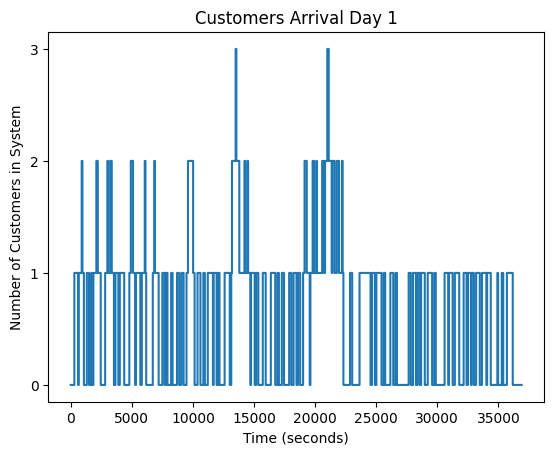

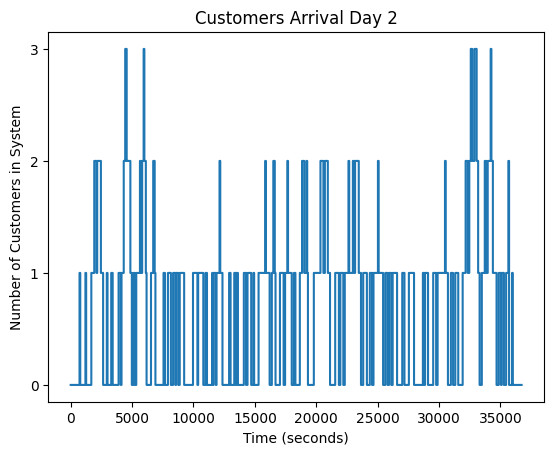

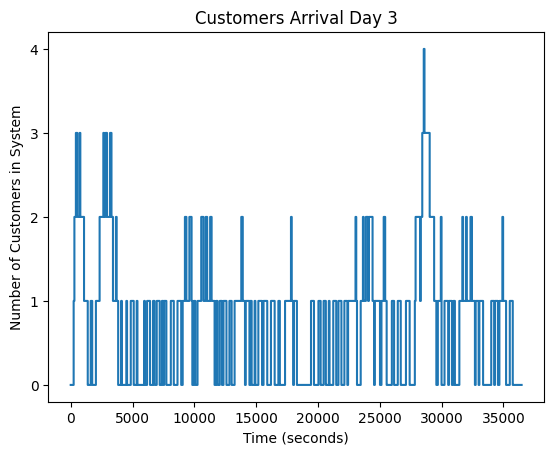

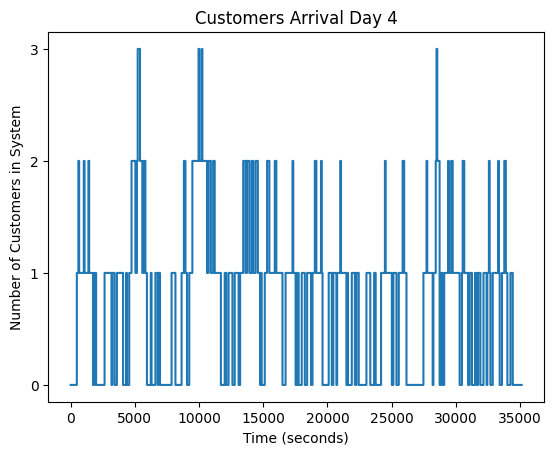

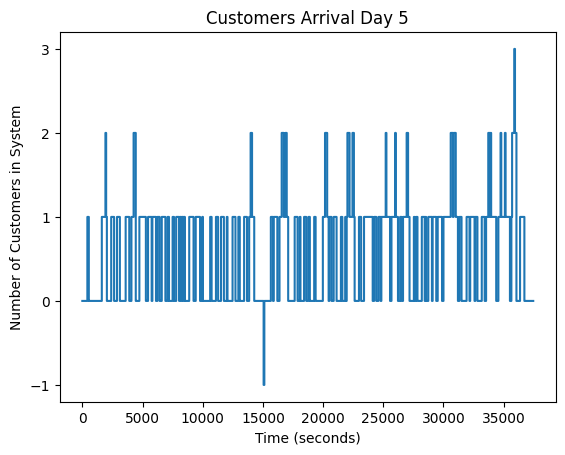

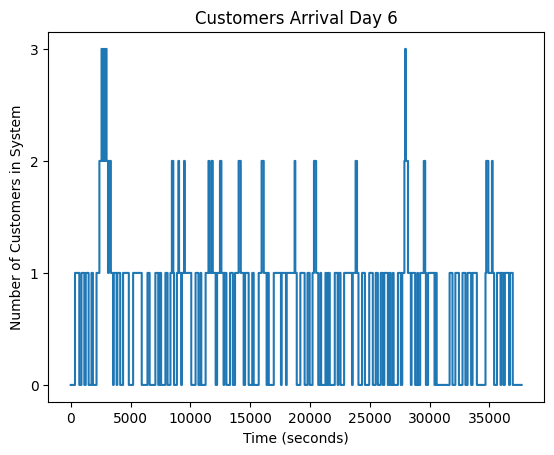

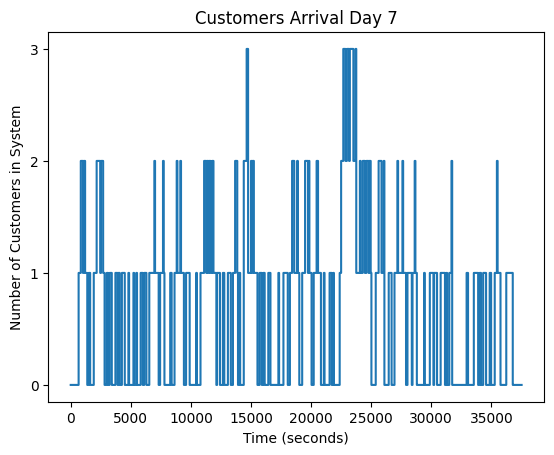

In [3]:
target_cust = 100
total_simulation = 7 #number of days
serv_util = np.zeros(total_simulation)
waiting_arr = np.zeros(total_simulation)

for i in range(total_simulation):
    next_arr_time = np.random.poisson(6, target_cust).astype(int) * 60
    service_time = np.random.normal(4, 2, target_cust).astype(int) * 60

    queue1 = QueueSim(next_arr_time, service_time, target_cust)
    queue1.simulation()

    serv_util[i] = queue1.server_utilization()
    waiting_arr[i] = queue1.average_waiting_time() / 60

    queue1.show_graph()
    plt.title(f'Customers Arrival Day {i + 1}')
    plt.show()

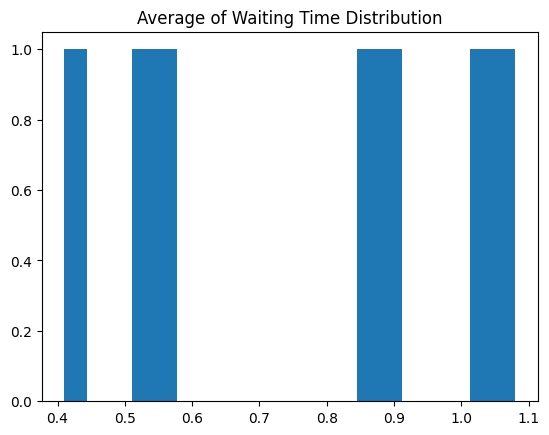

The average of waiting time: 0.7642857142857143 minutes


In [4]:
plt.hist(waiting_arr, 20)
plt.title('Average of Waiting Time Distribution')
plt.show()
print(f'The average of waiting time: {np.mean(waiting_arr)} minutes')

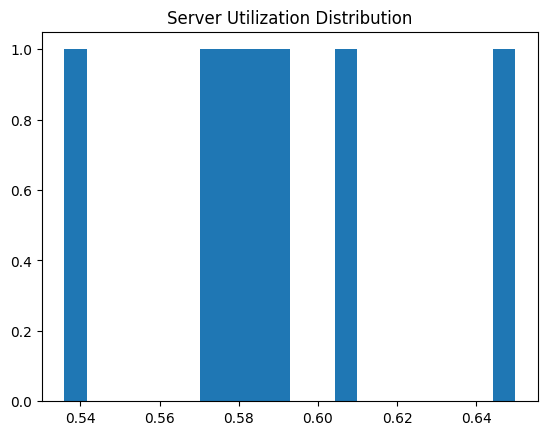

The average of server utilization: 0.5888653279558798 


In [5]:
plt.hist(serv_util, 20)
plt.title('Server Utilization Distribution')
plt.show()
print(f'The average of server utilization: {np.mean(serv_util)} ')